In [12]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
df = pd.read_csv('./data/heart_failure_clinical_records.csv')
df.head()
df.shape

(299, 13)

In [14]:
# df.info()
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [15]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [16]:
X_columns = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'sex', 'smoking', 'time']
y = df.DEATH_EVENT
scaler = StandardScaler()
df = scaler.fit_transform(df.loc[:, X_columns])
df

array([[ 1.19294523e+00, -8.71104775e-01,  1.65728387e-04, ...,
         7.35688190e-01, -6.87681906e-01, -1.62950241e+00],
       [-4.91279276e-01, -8.71104775e-01,  7.51463953e+00, ...,
         7.35688190e-01, -6.87681906e-01, -1.60369074e+00],
       [ 3.50832977e-01, -8.71104775e-01, -4.49938761e-01, ...,
         7.35688190e-01,  1.45416070e+00, -1.59078490e+00],
       ...,
       [-1.33339153e+00, -8.71104775e-01,  1.52597865e+00, ...,
        -1.35927151e+00, -6.87681906e-01,  1.90669738e+00],
       [-1.33339153e+00, -8.71104775e-01,  1.89039811e+00, ...,
         7.35688190e-01,  1.45416070e+00,  1.93250906e+00],
       [-9.12335403e-01, -8.71104775e-01, -3.98321274e-01, ...,
         7.35688190e-01,  1.45416070e+00,  1.99703825e+00]])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df, y.values, test_size=0.2, random_state=42)

In [18]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])
model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss=tf.keras.losses.binary_crossentropy,
                metrics=['accuracy'])

history = model_1.fit(X_train, y_train, epochs=50)

Epoch 1/50
8/8 [==============================] - 0s 1ms/step - loss: 0.7618 - accuracy: 0.7029
Epoch 2/50
8/8 [==============================] - 0s 873us/step - loss: 0.7443 - accuracy: 0.7029
Epoch 3/50
8/8 [==============================] - 0s 955us/step - loss: 0.7276 - accuracy: 0.7029
Epoch 4/50
8/8 [==============================] - 0s 2ms/step - loss: 0.7112 - accuracy: 0.7029
Epoch 5/50
8/8 [==============================] - 0s 1ms/step - loss: 0.6968 - accuracy: 0.7029
Epoch 6/50
8/8 [==============================] - 0s 879us/step - loss: 0.6839 - accuracy: 0.7029
Epoch 7/50
8/8 [==============================] - 0s 1ms/step - loss: 0.6710 - accuracy: 0.7029
Epoch 8/50
8/8 [==============================] - 0s 886us/step - loss: 0.6601 - accuracy: 0.7029
Epoch 9/50
8/8 [==============================] - 0s 1000us/step - loss: 0.6487 - accuracy: 0.7029
Epoch 10/50
8/8 [==============================] - 0s 788us/step - loss: 0.6384 - accuracy: 0.7029
Epoch 11/50
8/8 [=========

In [19]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(8, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                loss=tf.keras.losses.binary_crossentropy,
                metrics=['accuracy'])

history = model_2.fit(X_train, y_train, epochs=20)

Epoch 1/20
8/8 [==============================] - 0s 1ms/step - loss: 0.7389 - accuracy: 0.5230
Epoch 2/20
8/8 [==============================] - 0s 982us/step - loss: 0.6543 - accuracy: 0.7657
Epoch 3/20
8/8 [==============================] - 0s 873us/step - loss: 0.5907 - accuracy: 0.7657
Epoch 4/20
8/8 [==============================] - 0s 863us/step - loss: 0.4901 - accuracy: 0.7824
Epoch 5/20
8/8 [==============================] - 0s 910us/step - loss: 0.4069 - accuracy: 0.8201
Epoch 6/20
8/8 [==============================] - 0s 1ms/step - loss: 0.3483 - accuracy: 0.8326
Epoch 7/20
8/8 [==============================] - 0s 1ms/step - loss: 0.3050 - accuracy: 0.8619
Epoch 8/20
8/8 [==============================] - 0s 946us/step - loss: 0.2799 - accuracy: 0.8787
Epoch 9/20
8/8 [==============================] - 0s 1ms/step - loss: 0.2591 - accuracy: 0.8787
Epoch 10/20
8/8 [==============================] - 0s 1ms/step - loss: 0.2444 - accuracy: 0.8870
Epoch 11/20
8/8 [============

In [20]:
loss, accuracy = model_2.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

2/2 [==============================] - 0s 2ms/step - loss: 1.4506 - accuracy: 0.7500
Model loss on the test set: 1.4505971670150757
Model accuracy on the test set: 75.00%


Text(0.5, 1.0, 'Model_2 training curves')

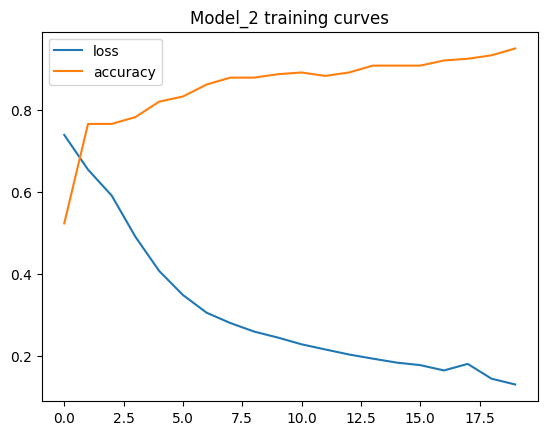

In [21]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_2 training curves")
# history.history

In [22]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])
model_3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                loss=tf.keras.losses.binary_crossentropy,
                metrics=['accuracy'])

history = model_3.fit(X_train, y_train, epochs=20)

Epoch 1/20
8/8 [==============================] - 0s 1ms/step - loss: 0.6166 - accuracy: 0.7071
Epoch 2/20
8/8 [==============================] - 0s 1ms/step - loss: 0.5336 - accuracy: 0.7029
Epoch 3/20
8/8 [==============================] - 0s 787us/step - loss: 0.4809 - accuracy: 0.7029
Epoch 4/20
8/8 [==============================] - 0s 930us/step - loss: 0.4524 - accuracy: 0.7029
Epoch 5/20
8/8 [==============================] - 0s 857us/step - loss: 0.4277 - accuracy: 0.7029
Epoch 6/20
8/8 [==============================] - 0s 857us/step - loss: 0.4026 - accuracy: 0.7280
Epoch 7/20
8/8 [==============================] - 0s 857us/step - loss: 0.3853 - accuracy: 0.7866
Epoch 8/20
8/8 [==============================] - 0s 1ms/step - loss: 0.3712 - accuracy: 0.8075
Epoch 9/20
8/8 [==============================] - 0s 1ms/step - loss: 0.3598 - accuracy: 0.8326
Epoch 10/20
8/8 [==============================] - 0s 930us/step - loss: 0.3452 - accuracy: 0.8577
Epoch 11/20
8/8 [==========

In [23]:
model_2.evaluate(X_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 1.4506 - accuracy: 0.7500


[1.4505971670150757, 0.75]